In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import h5py

### Setup

In [2]:
infile = open('higgs_100000_pt_250_500.pkl', 'rb')
infile_two = open('qcd_100000_pt_250_500.pkl', 'rb')
new_dict = pickle.load(infile)
new_dict_2 = pickle.load(infile_two)

In [3]:
higgs_data = pd.DataFrame(new_dict)
bkgd_data = pd.DataFrame(new_dict_2)

In [4]:
higgs_data.head(3)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496


In [5]:
bkgd_data.head(3)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091


## Lab 7

### Problem 1

Before we begin, let us observe the feature that we decided has the largest significance when it comes to detecting the Higgs-Boson particle. We plot stacked histograms of the 'mass' feature for both the higgs data and the qcd background normally and on a log scale. We also normalize both the higgs data and the background to the expected number of discoveries and plot that.

Text(0.5, 0, 'Mass')

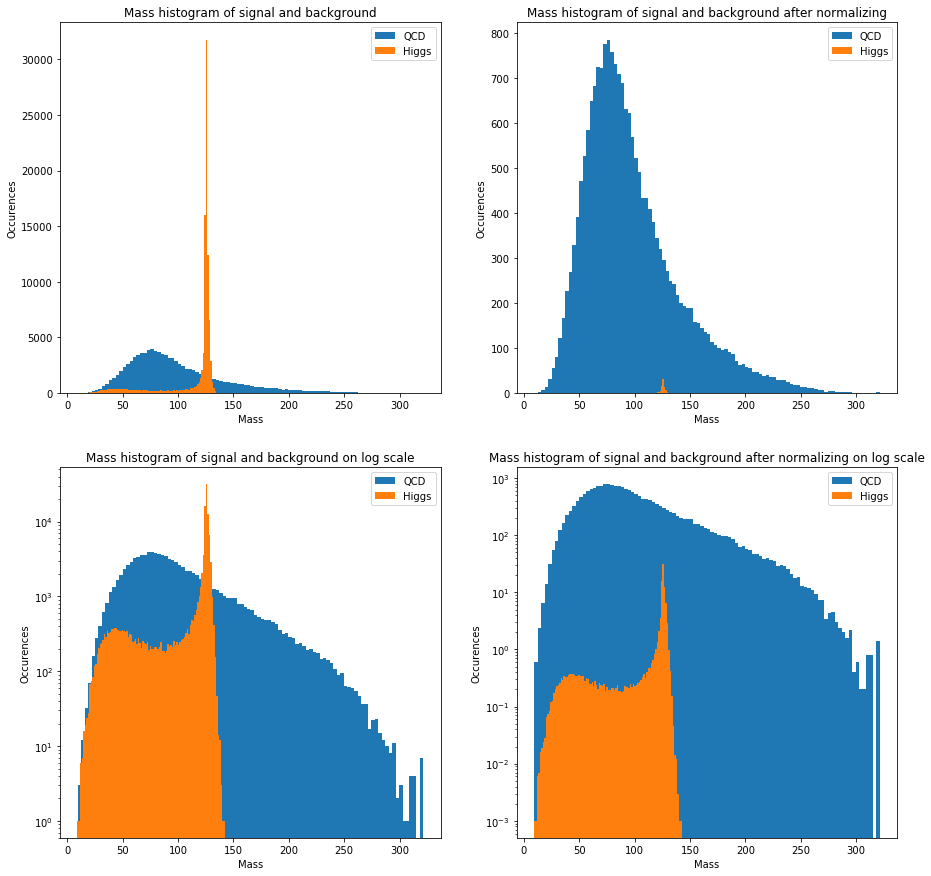

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))

ax[0,0].hist(bkgd_data['mass'], bins=100, label='QCD')
ax[0,0].hist(higgs_data['mass'], bins=100, label='Higgs')
ax[0,0].set_title('Mass histogram of signal and background')
ax[0,0].set_ylabel('Occurences')
ax[0,0].set_xlabel('Mass')
ax[0,0].legend()

ax[0,1].hist(bkgd_data['mass'], bins=100, label='QCD', weights=20000 * np.ones(len(bkgd_data['mass'])) / len(bkgd_data['mass']))
ax[0,1].hist(higgs_data['mass'], bins=100, label='Higgs', weights=100 * np.ones(len(higgs_data['mass'])) / len(higgs_data['mass']))
ax[0,1].set_title('Mass histogram of signal and background after normalizing')
ax[0,1].set_ylabel('Occurences')
ax[0,1].set_xlabel('Mass')
ax[0,1].legend()

ax[1,0].hist(bkgd_data['mass'], bins=100, label='QCD')
ax[1,0].hist(higgs_data['mass'], bins=100, label='Higgs')
ax[1,0].legend()
ax[1,0].set_title('Mass histogram of signal and background on log scale')
ax[1,0].set_ylabel('Occurences')
ax[1,0].set_xlabel('Mass')
ax[1,0].set_yscale('log')

ax[1,1].hist(bkgd_data['mass'], bins=100, label='QCD', weights=20000 * np.ones(len(bkgd_data['mass'])) / len(bkgd_data['mass']))
ax[1,1].hist(higgs_data['mass'], bins=100, label='Higgs', weights=100 * np.ones(len(higgs_data['mass'])) / len(higgs_data['mass']))
ax[1,1].legend()
ax[1,1].set_title('Mass histogram of signal and background after normalizing on log scale')
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Occurences')
ax[1,1].set_xlabel('Mass')

Now that we are done plotting, we must use poisson statistics to calculate the expected significance. We do so by finding the probability of dicovering 20,100 discoveries over a poisson background centered around 20,000 discoveries. We do this since we are finding the probability of dicovering all the possible signals out of the background, but since the background also contains some relevant signals we must include those in our process.

In [7]:
prob = stats.poisson.sf(20100, 20000)
sigma = stats.norm.isf(prob)
print('Significance using poisson statistics is: ' + str(sigma))

Significance using poisson statistics is: 0.7112259282313185


Next we find significance using the formula Nhiggs / √Nqcd . Where N is the expected number of relevant discoveries for the corresponding data.

In [8]:
s = 100/math.sqrt(20000)
print('Significance using formula is: ' + str(s))

Significance using formula is: 0.7071067811865475


Both ways give us a significance that is quite close. This makes sense since the overall dicovery should be the same regardless of the method used as long as the number of relavnt observations remains the same. In other words, both ways shoul provide us with comparable results since the threshold for discovery will remain constant whether we use poisson statisitcs or a generalized standard deviation formula.

### Problem 2

Now, we must find a way to cut the data based on the mass such that we maximize our significance while minimizing the amount of data cut. Our first cut is when the mass is between 100 GeV and the maximum mass value that the data contains.

In [9]:
trial1_higgs = higgs_data[(higgs_data['mass'] > 100) & (higgs_data['mass'] < higgs_data['mass'].max())]
trial1_qcd = bkgd_data[(bkgd_data['mass'] > 100) & (bkgd_data['mass'] < bkgd_data['mass'].max())]
n_higgs = 100 * len(trial1_higgs)/len(higgs_data)
print("Nhiggs = " + str(n_higgs))
n_qcd = 20000 * len(trial1_qcd)/len(bkgd_data)
print("Nqcd = " + str(n_qcd))

Nhiggs = 84.946
Nqcd = 7640.0


In [10]:
s = n_higgs/math.sqrt(n_qcd) 
print("New significance = " + str(s))

New significance = 0.9718433203284444


After our first cut, we see that Nhiggs has been reduced from 100 to 84 and Nqcd has reduced from 20,000 to 7640; however, our significance is still quite small so let's try making a more direct cut based on our knowledge of the Higgs-Boson particle. Since we know that the particle has a mass of 125 GeV, let us cut over a range between 120 and 130 GeV.

In [11]:
trial2_higgs = higgs_data[(higgs_data['mass'] > 120) & (higgs_data['mass'] < 130)]
trial2_qcd = bkgd_data[(bkgd_data['mass'] > 120) & (bkgd_data['mass'] < 130)]
n_higgs = 100 * len(trial2_higgs)/len(higgs_data)
print("NHiggs = " + str(n_higgs))
n_qcd = 20000 * len(trial2_qcd)/len(bkgd_data)
print("Nqcd = " + str(n_qcd))

NHiggs = 75.847
Nqcd = 980.2


In [12]:
s = n_higgs/math.sqrt(n_qcd) 
print("New significance = " + str(s))

New significance = 2.422596350179467


With our second cut, our expected number of Higgs-Boson particles in our signal data falls to 75 and the in the background falls to 980. Our significance has become much higher in comparison to before. Now, let's try an even more direct cut where we filter the mass to be around 125 GeV.

In [13]:
trial3_higgs = higgs_data[(higgs_data['mass'] > 124) & (higgs_data['mass'] < 126)]
trial3_qcd = bkgd_data[(bkgd_data['mass'] > 124) & (bkgd_data['mass'] < 126)]
n_higgs = 100 * len(trial3_higgs)/len(higgs_data)
print("Nhiggs = " + str(n_higgs))
n_qcd = 20000 * len(trial3_qcd)/len(bkgd_data)
print("Nqcd = " + str(n_qcd))

Nhiggs = 38.963
Nqcd = 197.8


In [14]:
s = n_higgs/math.sqrt(n_qcd) 
print("New significance = " + str(s))

New significance = 2.7703793721295153


After the third cut, our Nhiggs and Nqcd have become very small since a lot of data has been filtered out. However, our significance value has not increased a lot. This cut might have been too direct and a lot of data has been cut out. Hence, we will use our second mass cut moving forward.

### Problem 3 

Now, we need to plot the other features and see if there are any other feature that can be used to increase our significance.

In [15]:
col_names = [x for i,x in enumerate(higgs_data.columns) if i!=3]

Below, we will plot all the features other than mass while ensuring that each dataset has been normalized to the expected number of relevant observations.

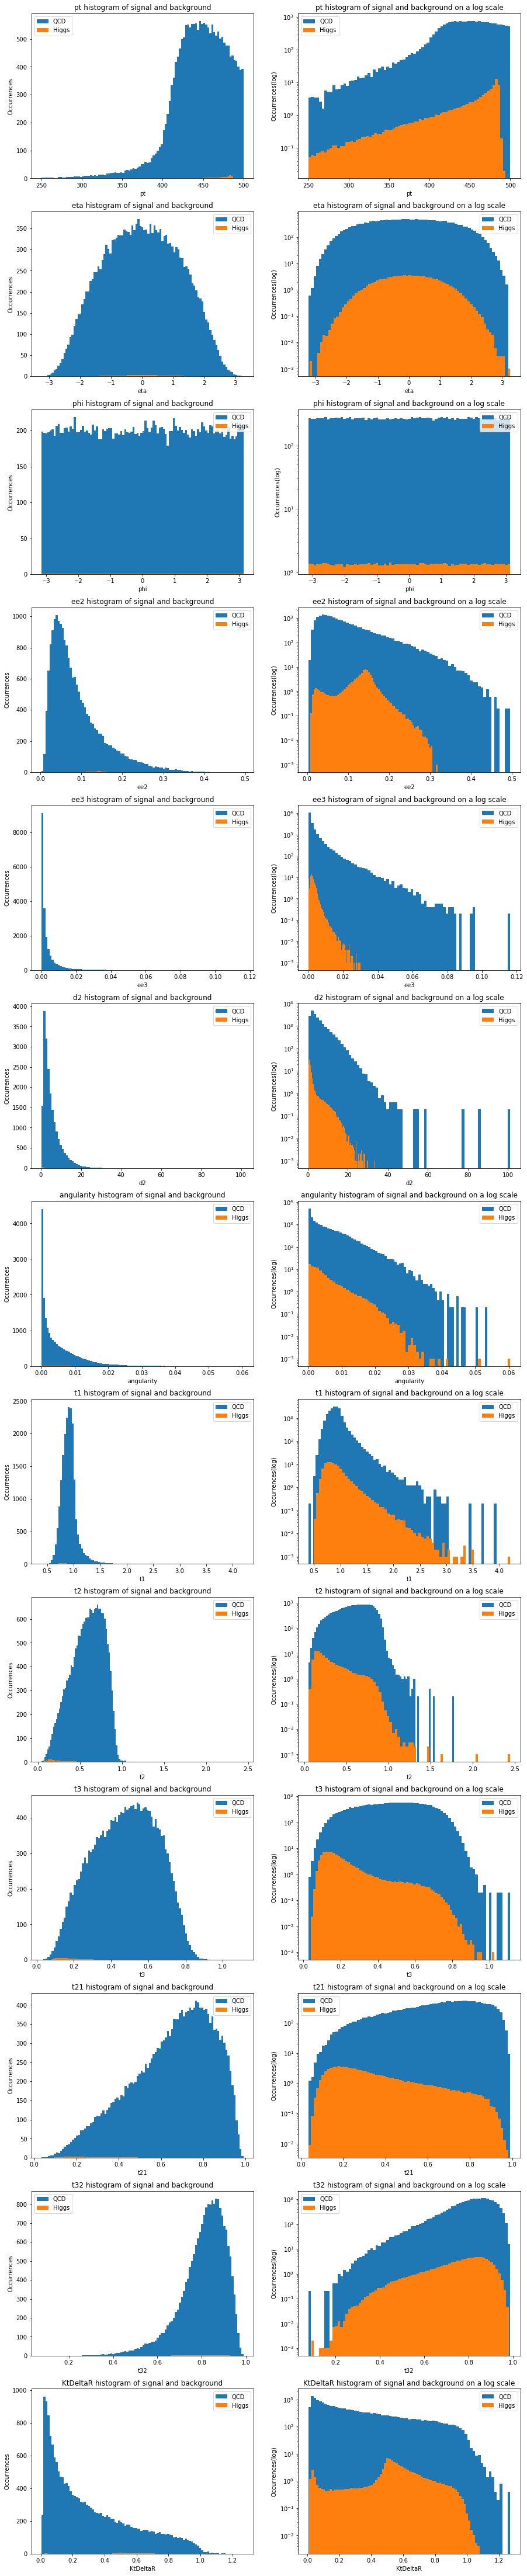

In [16]:
fig, axes = plt.subplots(13, 2, figsize=(15, 80))
for ax, column in zip(axes, col_names):
    ax[0].set_title(column + ' histogram of signal and background')
    ax[0].hist(bkgd_data[column], bins=100, label='QCD', weights=20000*np.ones(len(bkgd_data[column])) / len(bkgd_data[column]))
    ax[0].hist(higgs_data[column], bins=100, label='Higgs', weights=100*np.ones(len(higgs_data[column])) / len(higgs_data[column]))
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Occurrences')
    ax[0].legend()
    
    ax[1].set_title(column + ' histogram of signal and background on a log scale')
    ax[1].hist(bkgd_data[column], bins=75, label='QCD', weights=20000*np.ones(len(bkgd_data[column])) / len(bkgd_data[column]))
    ax[1].hist(higgs_data[column], bins=75, label='Higgs', weights=100*np.ones(len(higgs_data[column])) / len(higgs_data[column]))
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Occurrences(log)')
    ax[1].legend()

After looking at these plots, features such as ee3, d2, and angularity show promise when it comes to being suitable for cuts since there is minimal overlap between the signal data and the background.

Now, let us plot the features again, but this time after the mass cuts and after they have been normalized to the new expected number of relevant observations.

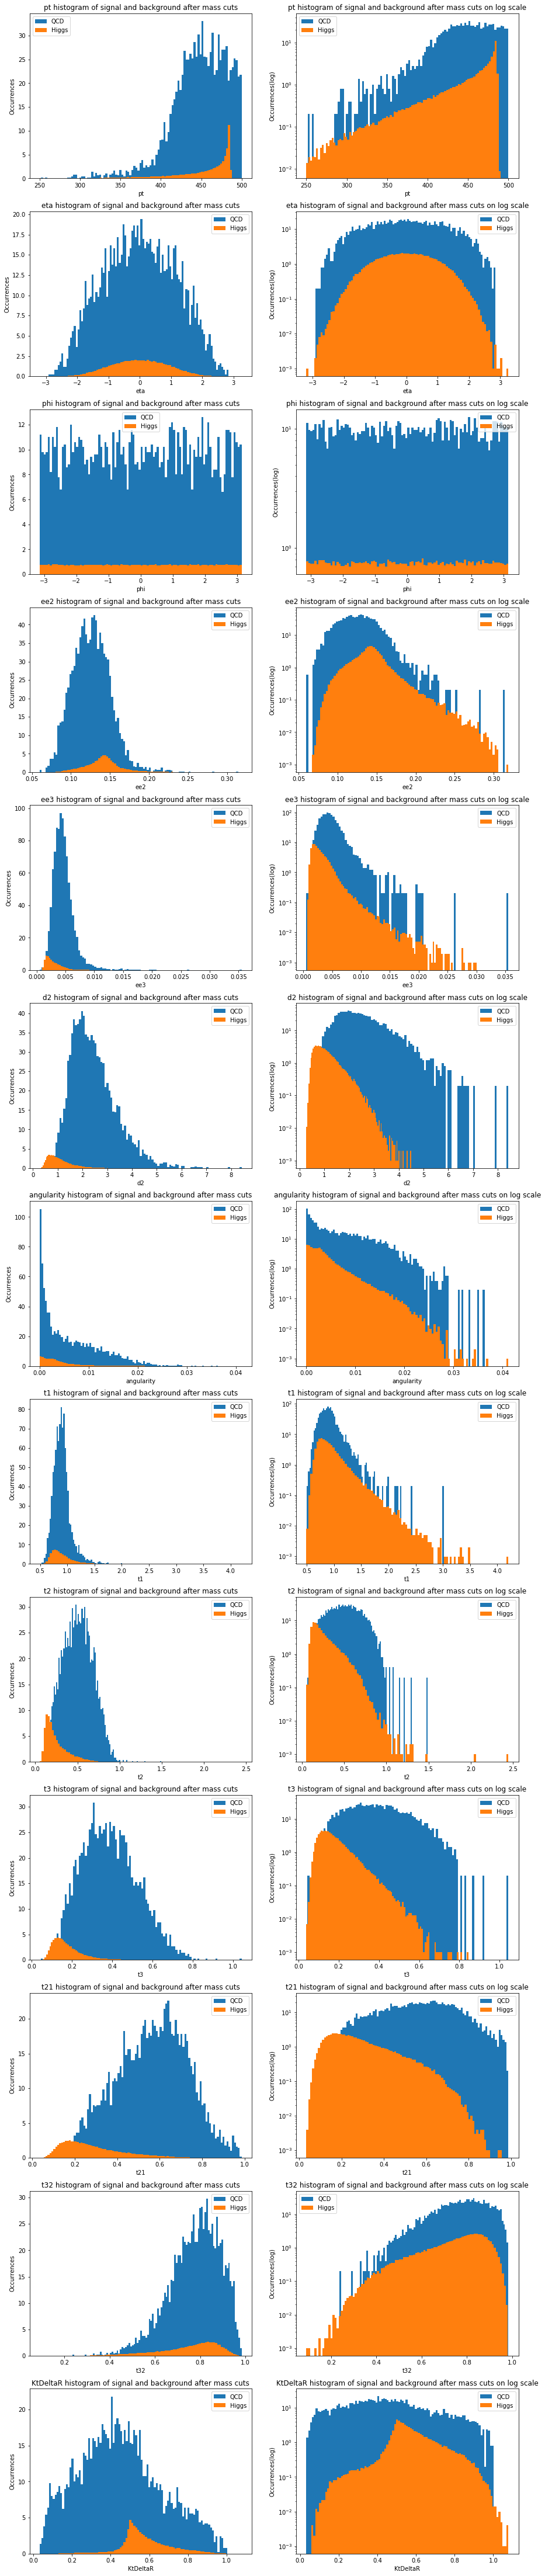

In [17]:
fig, axes = plt.subplots(13, 2, figsize=(15, 80))
for ax, column in zip(axes, col_names):
    ax[0].set_title(column + ' histogram of signal and background after mass cuts')
    ax[0].hist(trial2_qcd[column], bins=100, label='QCD', weights=980*np.ones(len(trial2_qcd)) / len(trial2_qcd))
    ax[0].hist(trial2_higgs[column], bins=100, label='Higgs', weights=75*np.ones(len(trial2_higgs)) / len(trial2_higgs))
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Occurrences')
    ax[0].legend()
    
    ax[1].set_title(column + ' histogram of signal and background after mass cuts on log scale')
    ax[1].hist(trial2_qcd[column], bins=100, label='QCD', weights=980*np.ones(len(trial2_qcd)) / len(trial2_qcd))
    ax[1].hist(trial2_higgs[column], bins=100, label='Higgs', weights=75*np.ones(len(trial2_higgs)) / len(trial2_higgs))
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Occurrences(log)')
    ax[1].legend()

After the relevant mass cuts have been made, we see that from our earlier selection only d2 still remains a valid choice. However, now t3 is also a feature that we can look at when it comes to making cuts.

### Problem 4

Now, let us find some other cuts on top of the mass cuts that can help us increase our significance.

In [18]:
qcd_m = trial2_qcd
higgs_m = trial2_higgs

After looking at the plots of d2 after the mass cuts, we can see that if we cut after 4 units then we will be getting rid of a lot of background data. Hence, we try to apply this cut and then observe the effects on our significance.

In [19]:
trial4_higgs = higgs_m[(higgs_m['d2'] > 0) & (higgs_m['d2'] < 4)]
trial4_qcd = qcd_m[(qcd_m['d2'] > 0) & (qcd_m['d2'] < 4)]
n_higgs = 75 * len(trial4_higgs)/len(higgs_data)
print("Nhiggs = " + str(n_higgs))
n_qcd = 980 * len(trial4_qcd)/len(bkgd_data)
print("Nqcd = " + str(n_qcd))

Nhiggs = 56.87775
Nqcd = 44.9624


In [20]:
s = n_higgs/math.sqrt(n_qcd)
print("New Significance = " + str(s))

New Significance = 8.482378850428272


Our suggested cuts work very well since our significance goes from 2.4 all the way to 8.5. Since our significance has already passed 5σ threshold for dicovery, we no longer need to keep cutting the data since we will only be getting rid of more and more data.

Before, we move on we plot all the features to:
1. See that our cuts are actually working (by looking at the d2 plot)
2. See how the cut has impacted other features and if there are still any features that show a lot of difference between the two datasets.

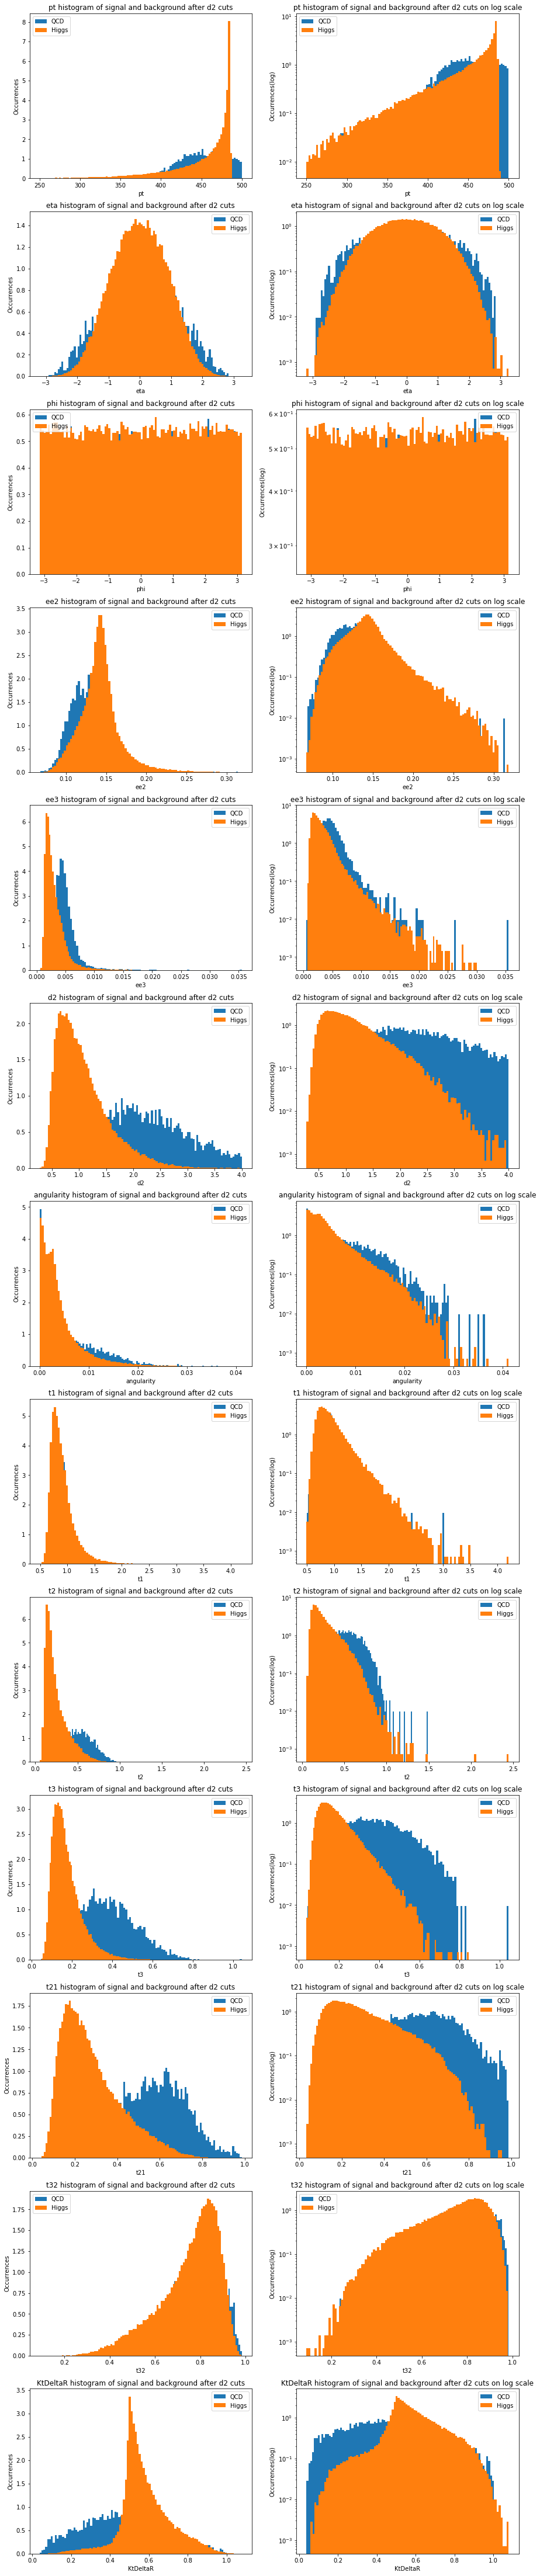

In [21]:
fig, axes = plt.subplots(13, 2, figsize=(15, 80))
for ax, column in zip(axes, col_names):
    ax[0].set_title(column + ' histogram of signal and background after d2 cuts')
    ax[0].hist(trial4_qcd[column], bins=100, label='QCD', weights=44*np.ones(len(trial4_qcd)) / len(trial4_qcd))
    ax[0].hist(trial4_higgs[column], bins=100, label='Higgs', weights=54*np.ones(len(trial4_higgs)) / len(trial4_higgs))
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Occurrences')
    ax[0].legend()
    
    ax[1].set_title(column + ' histogram of signal and background after d2 cuts on log scale')
    ax[1].hist(trial4_qcd[column], bins=100, label='QCD', weights=44*np.ones(len(trial4_qcd)) / len(trial4_qcd))
    ax[1].hist(trial4_higgs[column], bins=100, label='Higgs', weights=54*np.ones(len(trial4_higgs)) / len(trial4_higgs))
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Occurrences(log)')
    ax[1].legend()

By observing the plots we can see that our cuts did indeed work and that now there is extensive overlap between our signal data and the background data. If we were to make any more cuts, we will be getting rid of a lot of important data about the signal which is never good.

In [22]:
p1 = len(trial4_higgs)/len(higgs_data) * 100
print("After making all these cuts, " + str(p1) + "% of signal data is still present.")

After making all these cuts, 75.837% of signal data is still present.


In [23]:
p2 = len(trial4_qcd)/len(bkgd_data) * 100
print("After making all these cuts, " + str(p2) + "% of signal data is still present.")

After making all these cuts, 4.588% of signal data is still present.


Once again, we can see the impacts of our cuts on our datasets. While we maintained almost 76% of our signal data, only about 5% of the background data is left. This will help us maximize the chances of discovering an observation that could be the Higgs-Boson particle.

## Lab 8

### Setup

In [24]:
high_lumi = h5py.File('data_highLumi_pt_250_500.h5', 'r')
low_lumi = h5py.File('data_lowLumi_pt_250_500.h5', 'r')
hl_data = np.array(high_lumi.get('data/block0_values'))
hl_cols = np.array(high_lumi.get('data/block0_items'))
ll_data = np.array(low_lumi.get('data/block0_values'))
ll_cols = np.array(low_lumi.get('data/block0_items'))

cols = []
for i in hl_cols:
    temp = i.decode('UTF-8')
    cols = np.append(cols, temp)

In [25]:
hl = pd.DataFrame(hl_data)
hl.columns = cols
ll = pd.DataFrame(ll_data)
ll.columns = cols

In [26]:
hl.head(3)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,491.273762,0.885859,-1.607844,58.540714,0.027848,0.000236,10.916629,0.002658,0.723524,0.576035,0.451149,0.796152,0.783197,0.105238
1,443.077741,-0.850850,-1.808610,109.261432,0.111414,0.003361,2.430250,0.003674,1.081477,0.488437,0.431396,0.451639,0.883217,0.254729
2,487.700656,-0.848095,3.101697,80.398065,0.059299,0.000973,4.666474,0.004545,0.885087,0.637212,0.476032,0.719942,0.747054,0.231983


In [27]:
ll.head(3)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,499.974801,-0.340430,-3.124063,35.763836,0.016922,0.000061,12.505765,0.003937,1.181578,0.797111,0.724045,0.674615,0.908337,0.026663
1,470.525978,1.447995,-0.463162,79.069978,0.052447,0.000801,5.549873,0.000965,0.924677,0.752034,0.679503,0.813294,0.903554,0.136669
2,455.009985,-1.672870,-2.260314,56.401982,0.030301,0.000229,8.234025,0.000417,0.892902,0.630183,0.538919,0.705769,0.855178,0.106421


### Part 1 - High Luminosity Data

In [28]:
def norm_higgs_hist(column):
    return np.histogram(higgs_data[column], bins = np.arange(bkgd_data[column].min(), 
                        bkgd_data[column].max(), (bkgd_data[column].max() - bkgd_data[column].min())/100),
                        weights = 100 * np.ones(len(higgs_data['mass'])) / len(higgs_data['mass']))

def norm_qcd_hist(column):
    return np.histogram(bkgd_data[column], bins = np.arange(bkgd_data[column].min(),
                        bkgd_data[column].max(), (bkgd_data[column].max() - bkgd_data[column].min())/100),
                        weights= 20000 * np.ones(len(bkgd_data['mass'])) / len(bkgd_data['mass']))

Now, we are working with some data with high luminosity and we need to see if it is possible to find any relevant observations in it. First, we just plot the features that our event selection procedure focuses on as well as the sum of our signal and background data. This gives us a visual comparison between our observed data as well as what we expect to see. We also normalize our new data to the expected number of relevant
observations (20100).

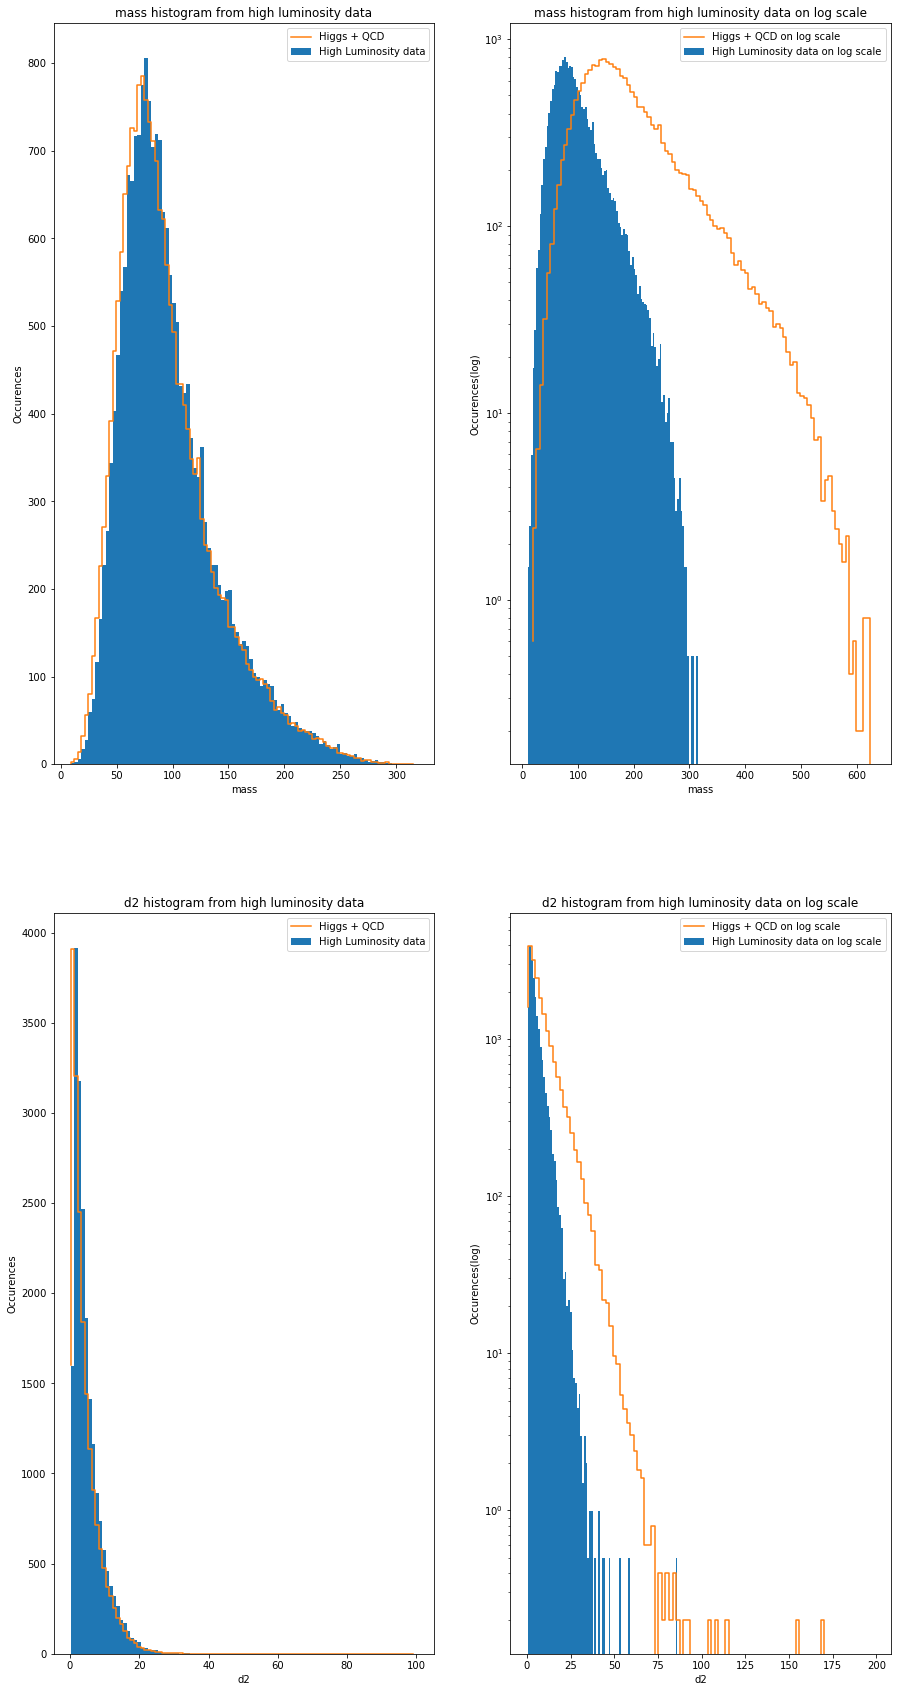

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 30))
for ax, column in zip(axes, ['mass', 'd2']):
    ax[0].hist(hl[column], bins = np.arange(bkgd_data[column].min(), bkgd_data[column].max(),
                                    (bkgd_data[column].max() - bkgd_data[column].min())/100),
                                    weights = 20100 * np.ones(len(hl[column])) / len(hl[column]), label='High Luminosity data')
    ax[0].step((norm_higgs_hist(column)[1][:-1] + norm_qcd_hist(column)[1][:-1])/2, norm_higgs_hist(column)[0] + norm_qcd_hist(column)[0], 
              label='Higgs + QCD')
    ax[0].set_title(column + ' histogram from high luminosity data')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Occurences')
    ax[0].legend()
    
    ax[1].hist(hl[column], bins = np.arange(bkgd_data[column].min(), bkgd_data[column].max(),
                                            (bkgd_data[column].max() - bkgd_data[column].min())/100),
                                            weights = 20100 * np.ones(len(hl[column])) / len(hl[column]),
                                            label='High Luminosity data on log scale')
    ax[1].step(norm_higgs_hist(column)[1][:-1] + norm_qcd_hist(column)[1][:-1], norm_higgs_hist(column)[0] + norm_qcd_hist(column)[0], 
              label='Higgs + QCD on log scale')
    ax[1].set_yscale('log')
    ax[1].set_title(column + ' histogram from high luminosity data on log scale')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Occurences(log)')
    ax[1].legend()

By observing the plots, we can see that the two are quite similar.

Now we perform the event selection procedure that we derived in Lab 7:
1. Cut so that the mass is between 120 and 130 GeV
2. Cut so that the d2 is between 0 and 4 units

In [30]:
hl_after_mass_cuts = hl[(hl['mass'] > 120) & (hl['mass'] < 130)]
hl_after_d2_cuts = hl_after_mass_cuts[(hl_after_mass_cuts['d2'] > 0) & (hl_after_mass_cuts['d2'] < 4)]

In [31]:
def higgs_after_sel(column):
    temp_h = trial4_higgs
    return np.histogram(temp_h[column], bins= np.arange(trial4_qcd[column].min(),
                                                        trial4_qcd[column].max(), (trial4_qcd[column].max() - trial4_qcd[column].min())/100),
                                                        weights = 56 * np.ones(len(temp_h['mass'])) / len(temp_h['mass']))

def qcd_after_sel(column):
    temp_q = trial4_qcd
    return np.histogram(temp_q[column], bins= np.arange(temp_q[column].min(),
                                                        temp_q[column].max(), (temp_q[column].max() - temp_q[column].min())/100),
                                                        weights = 44 * np.ones(len(temp_q['mass'])) / len(temp_q['mass']))

Now, we must plot the high luminosity data to see how the event selection procedure has affected it and see whether it still agrees with our
expected observation which comes from the sum of our signal and background normalized to the values of their relevant observations after they
went through the same cuts.

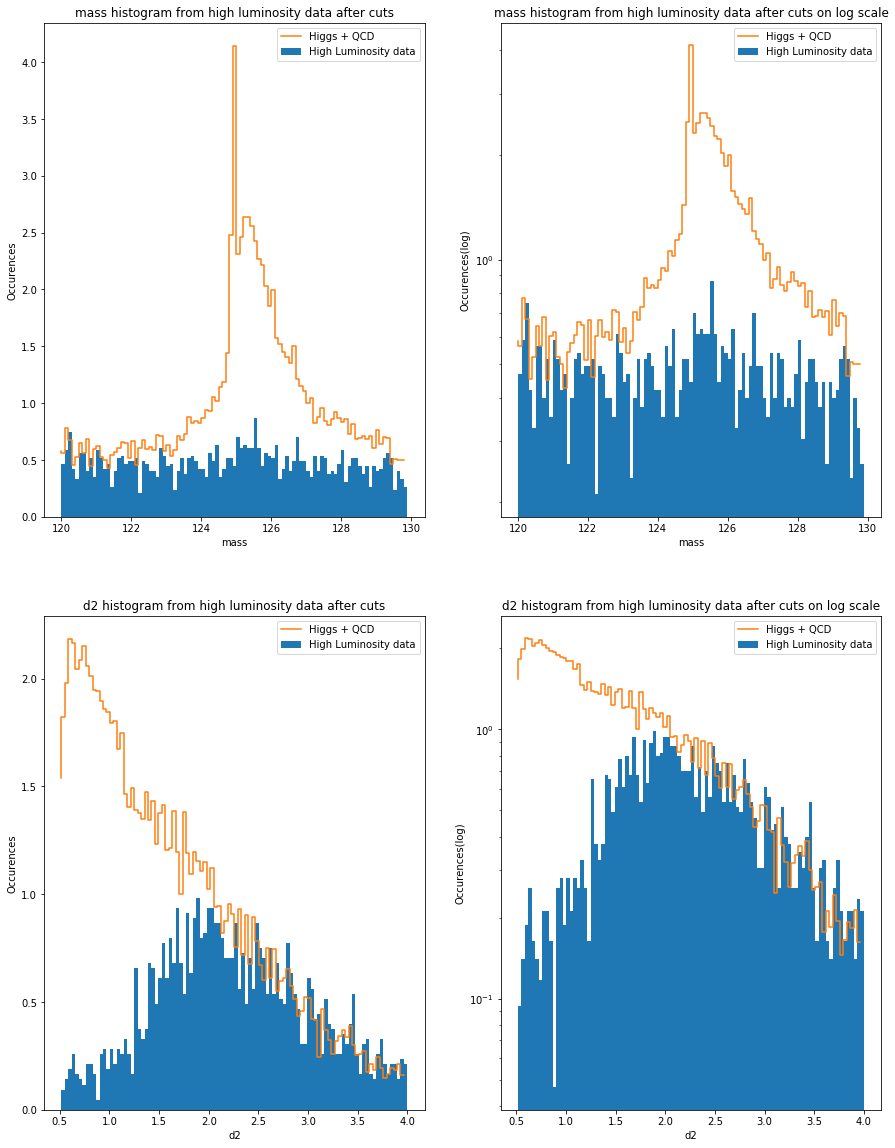

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(15, 20))
for ax, column in zip(axes, ['mass', 'd2']):
    ax[0].hist(hl_after_d2_cuts[column], bins= np.arange(trial4_qcd[column].min(),
                                                         trial4_qcd[column].max(), (trial4_qcd[column].max() - trial4_qcd[column].min())/100),
                                                        weights = 47 * np.ones(len(hl_after_d2_cuts[column])) / len(hl_after_d2_cuts[column]), 
                                                        label='High Luminosity data')
    ax[0].step((higgs_after_sel(column)[1][:-1] + qcd_after_sel(column)[1][:-1])/2, higgs_after_sel(column)[0] + qcd_after_sel(column)[0], 
              label='Higgs + QCD')
    ax[0].set_title(column + ' histogram from high luminosity data after cuts')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Occurences')
    ax[0].legend()
    
    ax[1].hist(hl_after_d2_cuts[column], bins= np.arange(trial4_qcd[column].min(),
                                                         trial4_qcd[column].max(), (trial4_qcd[column].max() - trial4_qcd[column].min())/100),
                                                        weights = 47 * np.ones(len(hl_after_d2_cuts[column])) / len(hl_after_d2_cuts[column]), 
                                                       label='High Luminosity data')
    ax[1].step((higgs_after_sel(column)[1][:-1] + qcd_after_sel(column)[1][:-1])/2, higgs_after_sel(column)[0] + qcd_after_sel(column)[0], 
              label='Higgs + QCD')
    ax[1].set_title(column + ' histogram from high luminosity data after cuts on log scale')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Occurences(log)')
    ax[1].legend()
    ax[1].set_yscale('log')

After performing the cuts, the histograms of the two features are no longer quite similar anymore. Next, we must find the the significance which we can do by recreating the normalized histogram for our new data and subtracting from it the overall background that we get from our initial data. We do this in order to only be left with Nhl which can be considered synonymous with Nhiggs from Lab 7.

In [34]:
temp = np.histogram(hl_after_d2_cuts['mass'], bins = np.arange(trial4_higgs['mass'].min(), trial4_qcd['mass'].max(),
                                                               (trial4_qcd['mass'].max() - trial4_higgs['mass'].min())/100),
                                                                weights = 47 * np.ones(len(hl_after_d2_cuts)) / len(hl_after_d2_cuts))

qcd = np.histogram(trial4_qcd['mass'], bins = np.arange(trial4_higgs[column].min(), trial4_qcd[column].max(),
                                                        (trial4_qcd[column].max() - trial4_higgs[column].min())/100),
                                                        weights = 100 * np.ones(len(trial4_qcd)) / len(trial4_qcd))
s = np.sum(temp[0]-qcd[0]) / math.sqrt(44)
print("New Significance = " + str(s))

New Significance = 7.046643439187079


Our significance value is quite high and is a little less than our expected value of about 8.5. THis significance value is still higher than the 5σ threshold that is required to claim a discovery so we can say that our cuts were successful on the high luminosity data.

### Part 2 - Low Luminosity Data

Now, we repeat the whole process with the low luminosity data.

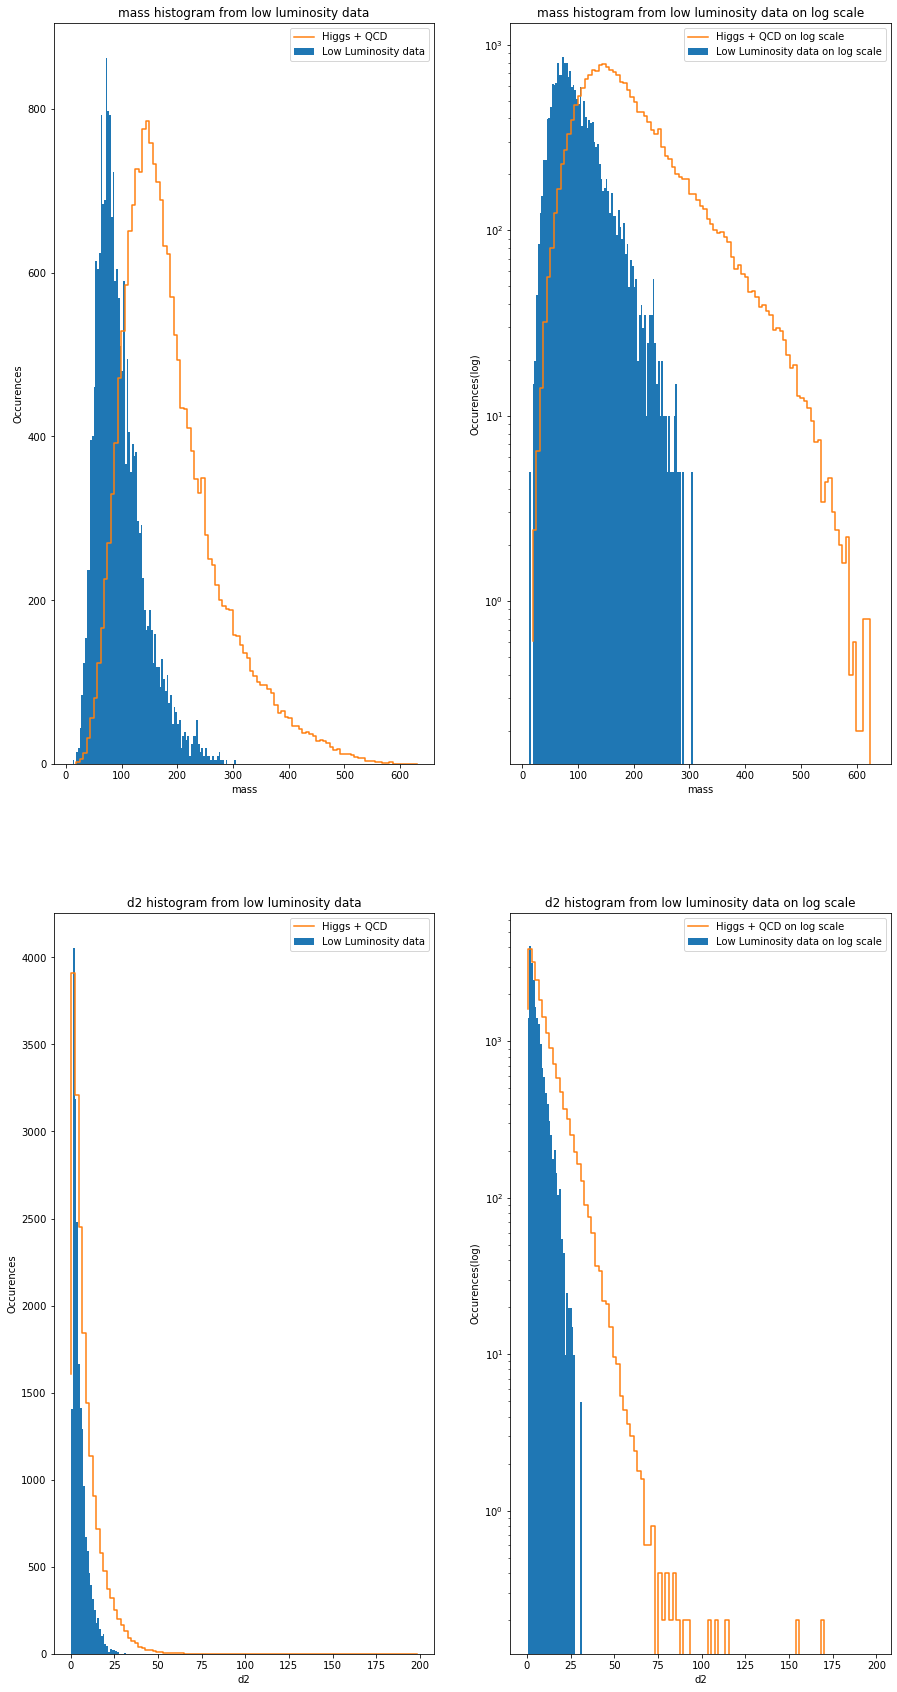

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(15, 30))
for ax, column in zip(axes, ['mass', 'd2']):
    ax[0].hist(ll[column], bins= np.arange(bkgd_data[column].min(), bkgd_data[column].max(),
                                           (bkgd_data[column].max() - bkgd_data[column].min())/100),
                                           weights = 20100 * np.ones(len(ll[column])) / len(ll[column]), label='Low Luminosity data')
    ax[0].step(norm_higgs_hist(column)[1][:-1] + norm_qcd_hist(column)[1][:-1], norm_higgs_hist(column)[0] + norm_qcd_hist(column)[0], 
              label='Higgs + QCD')
    ax[0].set_title(column + ' histogram from low luminosity data')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Occurences')
    ax[0].legend()
    
    ax[1].hist(ll[column], bins=np.arange(bkgd_data[column].min(), bkgd_data[column].max(),
                                          (bkgd_data[column].max() - bkgd_data[column].min())/100),
                                           weights = 20100 * np.ones(len(ll[column])) / len(ll[column]),
                                           label='Low Luminosity data on log scale')
    ax[1].step(norm_higgs_hist(column)[1][:-1] + norm_qcd_hist(column)[1][:-1], norm_higgs_hist(column)[0] + norm_qcd_hist(column)[0], 
              label='Higgs + QCD on log scale')
    ax[1].set_yscale('log')
    ax[1].set_title(column + ' histogram from low luminosity data on log scale')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Occurences(log)')
    ax[1].legend()

This time, there are some differences between our expected and observed mass readings but that is to be expected since this is pseudo-experimental data and it will diverge slightly.

In [36]:
ll_after_mass_cuts = ll[(ll['mass'] > 120) & (ll['mass'] < 130)]
ll_after_d2_cuts = ll_after_mass_cuts[(ll_after_mass_cuts['d2'] > 0) & (ll_after_mass_cuts['d2'] < 4)]

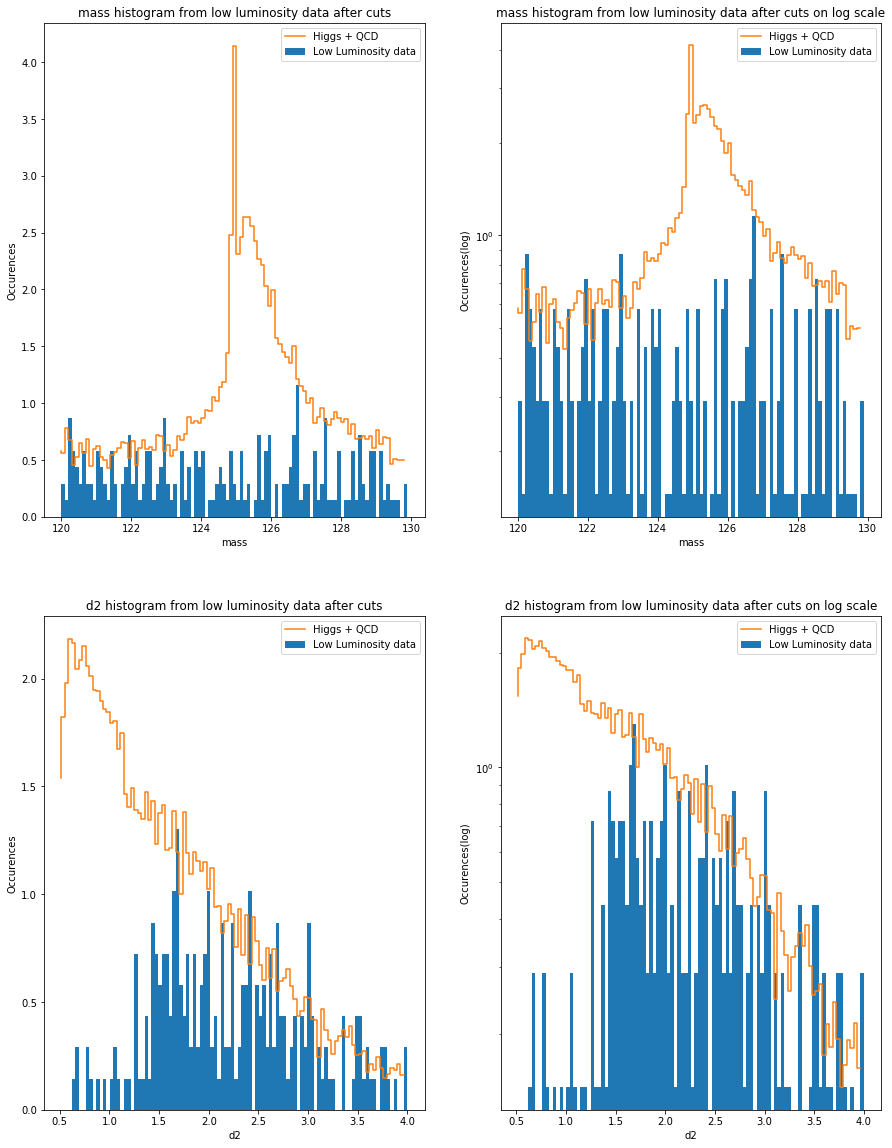

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15, 20))
for ax, column in zip(axes, ['mass', 'd2']):
    ax[0].hist(ll_after_d2_cuts[column], bins=np.arange(trial4_qcd[column].min(), trial4_qcd[column].max(),
                                                        (trial4_qcd[column].max() - trial4_qcd[column].min())/100),
                                                        weights = 33 * np.ones(len(ll_after_d2_cuts[column])) / len(ll_after_d2_cuts[column]), 
                                                        label='Low Luminosity data')
    ax[0].step((higgs_after_sel(column)[1][:-1] + qcd_after_sel(column)[1][:-1])/2, higgs_after_sel(column)[0] + qcd_after_sel(column)[0], 
              label='Higgs + QCD')
    ax[0].set_title(column + ' histogram from low luminosity data after cuts')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Occurences')
    ax[0].legend()
    
    ax[1].hist(ll_after_d2_cuts[column], bins=np.arange(trial4_qcd[column].min(), trial4_qcd[column].max(),
                                                        (trial4_qcd[column].max() - trial4_qcd[column].min())/100),
                                                        weights = 33 * np.ones(len(ll_after_d2_cuts[column])) / len(ll_after_d2_cuts[column]), 
                                                        label='Low Luminosity data')
    ax[1].step((higgs_after_sel(column)[1][:-1] + qcd_after_sel(column)[1][:-1])/2, higgs_after_sel(column)[0] + qcd_after_sel(column)[0], 
              label='Higgs + QCD')
    ax[1].set_title(column + ' histogram from low luminosity data after cuts on log scale')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Occurences(log)')
    ax[1].legend()
    ax[1].set_yscale('log')

After performing the cuts, the two are quite different. This time though, there are far fewer low luminosity data that made it through in comparison to the high luminosity data which can be seen by visually comparing the plots.

In [38]:
temp = np.histogram(ll_after_d2_cuts['mass'], bins = np.arange(trial4_higgs['mass'].min(), trial4_qcd['mass'].max(),
                                                               (trial4_qcd['mass'].max() - trial4_higgs['mass'].min())/100),
                                                                weights = 33 * np.ones(len(ll_after_d2_cuts)) / len(ll_after_d2_cuts))

qcd = np.histogram(trial4_qcd['mass'], bins = np.arange(trial4_higgs[column].min(), trial4_qcd[column].max(),
                                                        (trial4_qcd[column].max() - trial4_higgs[column].min())/100),
                                                        weights = 100 * np.ones(len(trial4_qcd)) / len(trial4_qcd))
s = np.sum(temp[0]-qcd[0]) / math.sqrt(44)
print("New Significance = " + str(s))

New Significance = 4.9749371855331095


This time our cuts did not produce a significance value over the threshold of discovery. There was a lot of data that was lost during the cuts and our cuts might have been to direct for this data. 

### Part 3 - Confidence Intervals

Now, we must compute the uper bound for the 95% confidence interval for the low luminosity data.

In [39]:
ll_95 = np.quantile(ll_after_d2_cuts['mass'], [0.95])
print("Upper Bound = " + str(ll_95[0]))

Upper Bound = 129.06518278327326


Next, we do the same but with our initial data

In [40]:
expected_95 = np.quantile(trial4_higgs['mass'], [0.95])
print("Expected Upper Bound = " + str(expected_95[0]))

Expected Upper Bound = 128.72483398891745


And also with our high luminosity data since its significance was high enough ater the cuts

In [41]:
observed_95 = np.quantile(hl_after_d2_cuts['mass'], [0.95])
print("Observed Upper Bound = " + str(observed_95[0]))

Observed Upper Bound = 129.32426543634912


The observed upper bound is slightly greater than the expected bound. This is fine since in nature we will not obtain perfect data such as from the initial higgs data that we were given. In reality the data will be quite messy and the process of event selection can lead to important information being lost without us knowing. If I had chosen to perfrom different cuts, these results might have been different; however, with our current results it will be slightly harder to find the Higgs-Boson particle in our observed data as the confidence interval is wider than the expected interval. 

### References

https://pythonpedia.com/en/knowledge-base/12283921/matplotlib-normed-histograms?fbclid=IwAR0JWnTJWIQqplJDth93LEREactVobY3qLRHIQXTzL-Q6Bp3OYak0QDHFj8, 
https://stackoverflow.com/questions/9141732/how-does-numpy-histogram-work


Used to figure out bin sizes when normalizing in Lab 8 

Lab 5 for procedure to normalize histogram